# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」が用意されていることを確認します。

In [2]:
ls -l photo.jpg

-rw-r--r--. 1 root root 47187 Mar 31 22:45 photo.jpg


画像ファイル「photo.jpg」を読み込みます。

In [3]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

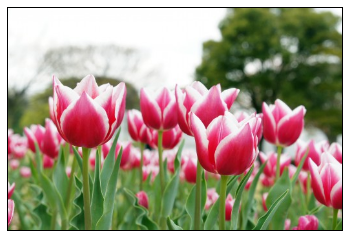

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [5]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (254, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [7]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print "Initial centers:",
    print map(lambda x: x.tolist(), center)
    print "========================"
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print map(lambda x: x.tolist(), center)
        print "Distortion: J=%d" % distortion_new

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print "Done."
    return new_pixels

例として、2つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 2)

Initial centers: [[224, 124, 120], [26, 46, 156]]
[[195, 164, 157], [65, 90, 41]]
Distortion: J=3300497180
[[219, 192, 194], [95, 91, 50]]
Distortion: J=1533423450
[[229, 209, 213], [106, 94, 58]]
Distortion: J=1020802072
[[233, 216, 220], [110, 96, 62]]
Distortion: J=907000271
[[234, 218, 222], [112, 96, 63]]
Distortion: J=889017645
[[234, 219, 223], [112, 96, 64]]
Distortion: J=886724122
[[234, 219, 223], [112, 96, 64]]
Distortion: J=886260562
Done.


結果を画像として表示します。

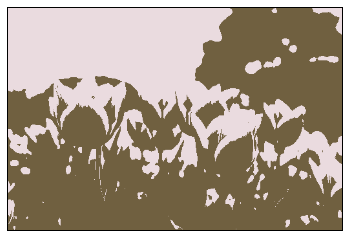

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 3)

Initial centers: [[52, 71, 208], [138, 37, 223], [197, 212, 32]]
[[57, 82, 42], [200, 72, 106], [177, 182, 155]]
Distortion: J=5428341523
[[78, 100, 48], [192, 57, 85], [216, 210, 204]]
Distortion: J=1303322594
[[84, 109, 56], [189, 58, 84], [232, 220, 222]]
Distortion: J=659327442
[[86, 111, 58], [190, 59, 86], [234, 223, 226]]
Distortion: J=579285638
[[86, 111, 58], [190, 60, 87], [235, 224, 227]]
Distortion: J=574106262
[[86, 111, 58], [190, 61, 87], [235, 225, 227]]
Distortion: J=573537138
Done.


結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

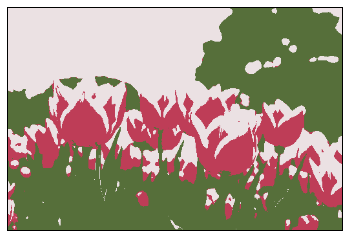

In [11]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [12]:
result = run_kmeans(pixels, 8)

Initial centers: [[118, 15, 235], [249, 239, 18], [213, 83, 31], [248, 149, 94], [118, 126, 67], [53, 209, 101], [151, 242, 185], [9, 143, 163]]
[[0, 0, 0], [0, 0, 0], [183, 31, 62], [220, 126, 154], [88, 111, 59], [125, 183, 122], [235, 231, 231], [0, 0, 0]]
Distortion: J=1300528413
[[28, 53, 17], [0, 0, 0], [180, 32, 60], [216, 127, 154], [84, 109, 53], [138, 157, 115], [240, 235, 237], [0, 0, 0]]
Distortion: J=321432279
[[39, 64, 22], [10, 23, 9], [180, 32, 60], [216, 132, 158], [87, 114, 55], [134, 150, 106], [241, 236, 238], [0, 0, 0]]
Distortion: J=234823557
[[44, 69, 25], [17, 39, 11], [181, 32, 61], [214, 138, 160], [89, 116, 56], [131, 147, 102], [241, 237, 238], [0, 0, 0]]
Distortion: J=216905148
[[49, 74, 28], [22, 47, 14], [181, 33, 62], [212, 143, 162], [90, 117, 56], [130, 146, 100], [242, 238, 239], [9, 18, 5]]
Distortion: J=209305078
[[52, 77, 30], [26, 52, 16], [182, 33, 63], [211, 146, 164], [91, 118, 57], [129, 146, 99], [242, 239, 240], [10, 29, 8]]
Distortion: J=20

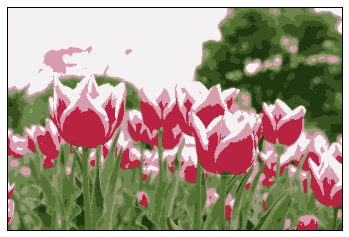

In [13]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)